In [25]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
from sklearn import preprocessing
import xgboost as xgb
import lightgbm as lgb
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

def normalize_map(data):
    for x in data.columns:
        if x not in ['row_id', 'user_id', 'label', 'shop_id', 
                     'time_stamp', 'mall_id', 'wifi_infos',
                     'longitude', 'latitude', 'weekend', 'night']:
            col_max = data[x].max()
            col_min = data[x].min()
            if col_max == col_min:
                data[x] = -data[x]
            else:
                data[x] = \
                (data[x] - col_min) / (col_max - col_min) * 100
            data[x] = data[x].fillna(0)
    print "Finish normalization!"
    
def add_wk_feature(data):
    combine['time_stamp'] = pd.to_datetime(combine['time_stamp'])
    combine['weekend'] = 0 # 工作日
    combine.loc[combine['time_stamp'].dt.dayofweek > 4, 'weekend'] = 1 # 周末    

def add_night_feature(data):
    combine['night'] = 0 # 白天
    combine.loc[combine['time_stamp'].dt.hour >= 19, 'night'] = 1 # 晚上

# main
path = './'
train = pd.read_csv(path + 'train.csv')
train.head(5)
test = pd.read_csv(path + 'X.csv')
test.head(5)
combine = pd.concat([train, test])
combine.info()
# weekend feature
# add_wk_feature(combine)
# night or not
# add_night_feature(combine)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1138015 entries, 0 to 451607
Data columns (total 8 columns):
latitude      1138015 non-null float64
longitude     1138015 non-null float64
mall_id       1138015 non-null object
row_id        451608 non-null float64
shop_id       686407 non-null object
time_stamp    1138015 non-null object
user_id       1138015 non-null object
wifi_infos    1138015 non-null object
dtypes: float64(3), object(5)
memory usage: 78.1+ MB


In [26]:
combine['time_stamp'] = pd.to_datetime(combine['time_stamp'])
combine['hour'] = combine['time_stamp'].dt.hour

(1138015, 10)


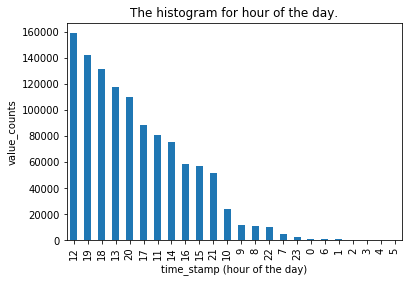

In [31]:
print combine.shape
combine['hour'].value_counts().plot.bar()
plt.xlabel('time_stamp (hour of the day)')
plt.ylabel('value_counts')
plt.title('The histogram for hour of the day.')
plt.savefig('hour.png')

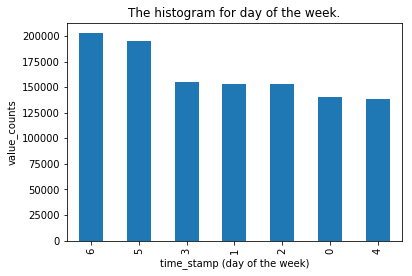

In [30]:
combine['weekday'] = combine['time_stamp'].dt.dayofweek
combine['weekday'].value_counts().plot.bar()
plt.xlabel('time_stamp (day of the week)')
plt.ylabel('value_counts')
plt.title('The histogram for day of the week.')
plt.savefig('week.png')

In [5]:
combine['night'] = 0 # 白天
combine.loc[combine['time_stamp'].dt.hour == 12, 'night'] = 1 # 晚上
combine.loc[combine['time_stamp'].dt.hour == 20, 'night'] = 1 # 晚上
combine.loc[combine['time_stamp'].dt.hour == 18, 'night'] = 1 # 晚上
combine.loc[combine['time_stamp'].dt.hour == 19, 'night'] = 1 # 晚上
print combine['time_stamp'].head(10)
print combine['night'].head(10)

0   2017-08-06 21:20:00
1   2017-08-06 21:20:00
2   2017-08-02 13:10:00
3   2017-08-13 12:30:00
4   2017-08-11 14:20:00
5   2017-08-06 14:50:00
6   2017-08-02 17:30:00
7   2017-08-02 18:30:00
8   2017-08-15 09:40:00
9   2017-08-13 11:20:00
Name: time_stamp, dtype: datetime64[ns]
0    0
1    0
2    0
3    1
4    0
5    0
6    0
7    1
8    0
9    0
Name: night, dtype: int64
